In [6]:
import pandas as pd
import matplotlib.pyplot as  plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
pip install wordcloud
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix
import seaborn
#from textstat.textstat import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
import warnings
import neattext as nt
import neattext.functions as nfx
%matplotlib inline

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
df = pd.read_csv('labeled_data.csv')
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
df.isna().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [ ]:
tweet = df['tweet']
tweet

0        !!! RT @mayasolovely: As a woman you shouldn't...
1        !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3        !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4        !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like I ain...
24781                youu got wild bitches tellin you lies
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 24783, dtype: object

0. HATE SPEECH
1. OFFENSIVE LANGUAGE 
2. NEITHER

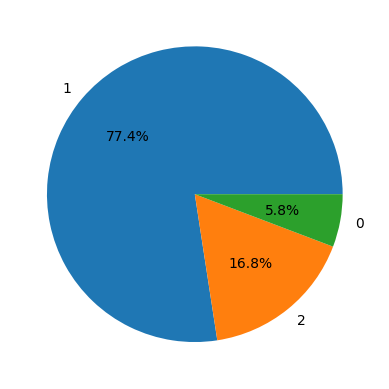

In [ ]:

plt.pie(df['class'].value_counts().values,
        labels = df['class'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

TEXT PREPROCESSING And Data Cleaning

In [ ]:
df['tweet'] = df['tweet'].str.lower()
 
# Removing punctuations present in the text
punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)
 
df['tweet']= df['tweet'].apply(lambda x: remove_punctuations(x))
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt mayasolovely as a woman you shouldnt compl...
1,1,3,0,3,0,1,rt mleew17 boy dats coldtyga dwn bad for cuff...
2,2,3,0,3,0,1,rt urkindofbrand dawg rt 80sbaby4life you eve...
3,3,3,0,2,1,1,rt cganderson vivabased she look like a tranny
4,4,6,0,6,0,1,rt shenikaroberts the shit you hear about me ...


In [ ]:

def remove_stopwords(text):
    stop_words = stopwords.words('english')
 
    imp_words = []
 
    # Storing the important words
    for word in str(text).split():
 
        if word not in stop_words:
 
            # Let's Lemmatize the word as well
            # before appending to the imp_words list.
 
            lemmatizer = WordNetLemmatizer()
            lemmatizer.lemmatize(word)
 
            imp_words.append(word)
 
    output = " ".join(imp_words)
 
    return output
 
 
df['tweet'] = df['tweet'].apply(lambda text: remove_stopwords(text))
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt mayasolovely woman shouldnt complain cleani...
1,1,3,0,3,0,1,rt mleew17 boy dats coldtyga dwn bad cuffin da...
2,2,3,0,3,0,1,rt urkindofbrand dawg rt 80sbaby4life ever fuc...
3,3,3,0,2,1,1,rt cganderson vivabased look like tranny
4,4,6,0,6,0,1,rt shenikaroberts shit hear might true might f...


In [ ]:
stopwords = nltk.corpus.stopwords.words("english")

#extending the stopwords to include other words used in twitter such as retweet(rt) etc.
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)
stemmer = PorterStemmer()

def preprocess(tweet):  
    
    # removal of extra spaces
    regex_pat = re.compile(r'\s+')
    tweet_space = tweet.str.replace(regex_pat, ' ')

    # removal of @name[mention]
    regex_pat = re.compile(r'@[\w\-]+')
    tweet_name = tweet_space.str.replace(regex_pat, '')

    # removal of links[https://abc.com]
    giant_url_regex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
            '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweets = tweet_name.str.replace(giant_url_regex, '')
    
    # removal of punctuations and numbers
    punc_remove = tweets.str.replace("[^a-zA-Z]", " ")
    # remove whitespace with a single space
    newtweet=punc_remove.str.replace(r'\s+', ' ')
    # remove leading and trailing whitespace
    newtweet=newtweet.str.replace(r'^\s+|\s+?$','')
    # replace normal numbers with numbr
    newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')
    # removal of capitalization
    tweet_lower = newtweet.str.lower()
    
    # tokenizing
    tokenized_tweet = tweet_lower.apply(lambda x: x.split())
    tokenized_tweet=  tokenized_tweet.apply(lambda x: [item for item in x if item not in stopwords])
    
    # stemming of the tweets
    tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
    
    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
        tweets_p= tokenized_tweet
    
    return tweets_p

processed_tweets = preprocess(tweet)   

df['processed_tweets'] = processed_tweets
print(df[["tweet","processed_tweets"]].head(10))

C:\Users\Pulkit\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:24: FutureWarning: The default value of regex will change from True to False in a future version.
C:\Users\Pulkit\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:26: FutureWarning: The default value of regex will change from True to False in a future version.
C:\Users\Pulkit\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
C:\Users\Pulkit\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:30: FutureWarning: The default value of regex will change from True to False in a future version.


                                               tweet  \
0  rt mayasolovely woman shouldnt complain cleani...   
1  rt mleew17 boy dats coldtyga dwn bad cuffin da...   
2  rt urkindofbrand dawg rt 80sbaby4life ever fuc...   
3           rt cganderson vivabased look like tranny   
4  rt shenikaroberts shit hear might true might f...   
5  tmadisonx shit blows meclaim faithful somebody...   
6  brighterdays sit hate another bitch got much s...   
7  8220selfiequeenbri cause im tired big bitches ...   
8              amp might get ya bitch back amp thats   
9    rhythmixx hobbies include fighting mariam bitch   

                                    processed_tweets  
0  mayasolov woman shouldnt complain clean hous a...  
1  mleew boy dat coldtyga dwn bad cuffin dat hoe ...  
2  urkindofbrand dawg sbabi life ever fuck bitch ...  
3                cganderson vivabas look like tranni  
4  shenikarobert shit hear might true might faker...  
5  tmadisonx shit blow meclaim faith somebodi sti... 

In [ ]:
# Extract Userhandles
df["userhandles"] = df["tweet"].apply(nfx.extract_userhandles)

In [ ]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,processed_tweets,userhandles
0,0,3,0,0,3,2,rt mayasolovely woman shouldnt complain cleani...,mayasolov woman shouldnt complain clean hous a...,[]
1,1,3,0,3,0,1,rt mleew17 boy dats coldtyga dwn bad cuffin da...,mleew boy dat coldtyga dwn bad cuffin dat hoe ...,[]
2,2,3,0,3,0,1,rt urkindofbrand dawg rt 80sbaby4life ever fuc...,urkindofbrand dawg sbabi life ever fuck bitch ...,[]
3,3,3,0,2,1,1,rt cganderson vivabased look like tranny,cganderson vivabas look like tranni,[]
4,4,6,0,6,0,1,rt shenikaroberts shit hear might true might f...,shenikarobert shit hear might true might faker...,[]


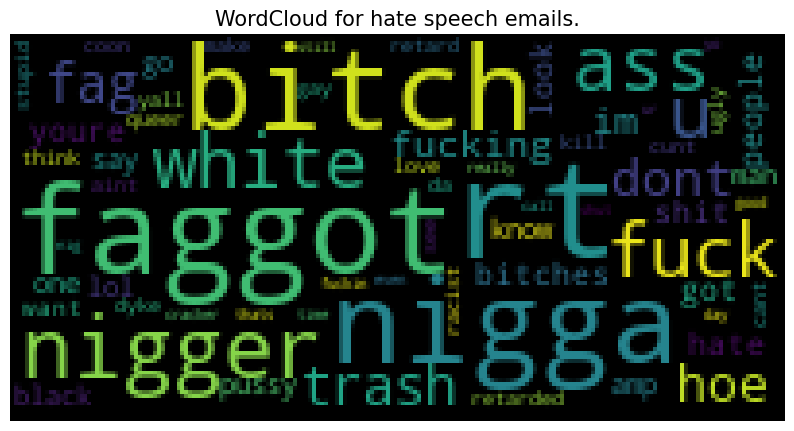

In [ ]:

def plot_word_cloud(data, typ):
  # Joining all the tweets to get the corpus
  email_corpus = " ".join(data['tweet'])
 
  plt.figure(figsize = (10,10))
   
  # Forming the word cloud
  wc = WordCloud(max_words = 100,
                width = 200,
                height = 100,
                collocations = False).generate(email_corpus)
   
  # Plotting the wordcloud obtained above
  plt.title(f'WordCloud for {typ} emails.', fontsize = 15)
  plt.axis('off')
  plt.imshow(wc)
  plt.show()
  print()
 
plot_word_cloud(df[df['class']==0], typ='hate speech')

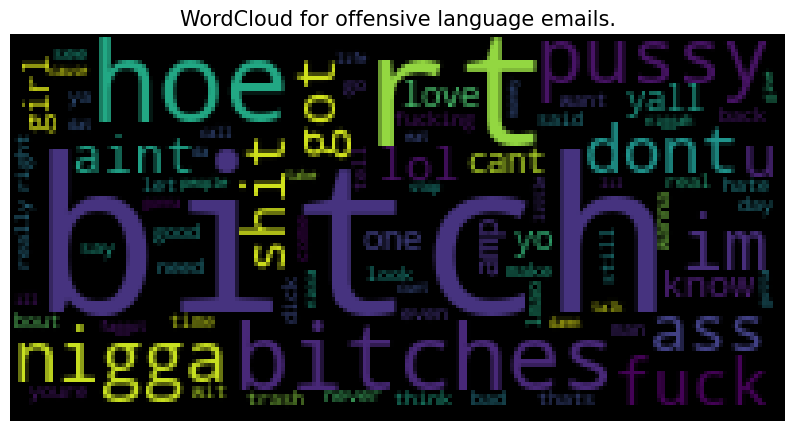

In [ ]:

def plot_word_cloud(data, typ):
  # Joining all the tweets to get the corpus
  email_corpus = " ".join(data['tweet'])
 
  plt.figure(figsize = (10,10))
   
  # Forming the word cloud
  wc = WordCloud(max_words = 100,
                width = 200,
                height = 100,
                collocations = False).generate(email_corpus)
   
  # Plotting the wordcloud obtained above
  plt.title(f'WordCloud for {typ} emails.', fontsize = 15)
  plt.axis('off')
  plt.imshow(wc)
  plt.show()
  print()
 
plot_word_cloud(df[df['class']==1], typ='offensive language')

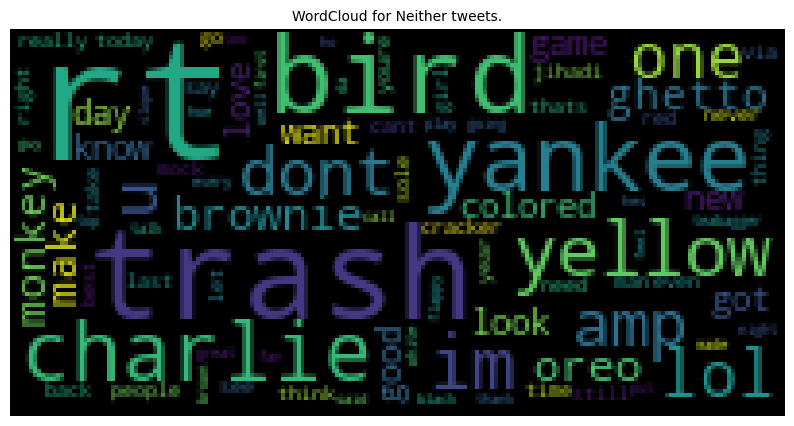

In [ ]:

def plot_word_cloud(data, typ):
  # Joining all the tweets to get the corpus
  email_corpus = " ".join(data['tweet'])
 
  plt.figure(figsize = (10,10))
   
  # Forming the word cloud
  wc = WordCloud(max_words = 200,
                width = 200,
                height = 100,
                collocations = False).generate(email_corpus)
   
  # Plotting the wordcloud obtained above
  plt.title(f'WordCloud for {typ} tweets.', fontsize = 10)
  plt.axis('off')
  plt.imshow(wc)
  plt.show()
  print()
 
plot_word_cloud(df[df['class']==2], typ='Neither')

In [ ]:
df['label'] = df['class'].map({0:"hate speech detected" , 1:"offensive speech" , 2:"Neither"})
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,processed_tweets,userhandles,label
0,0,3,0,0,3,2,rt mayasolovely woman shouldnt complain cleani...,mayasolov woman shouldnt complain clean hous a...,[],Neither
1,1,3,0,3,0,1,rt mleew17 boy dats coldtyga dwn bad cuffin da...,mleew boy dat coldtyga dwn bad cuffin dat hoe ...,[],offensive speech
2,2,3,0,3,0,1,rt urkindofbrand dawg rt 80sbaby4life ever fuc...,urkindofbrand dawg sbabi life ever fuck bitch ...,[],offensive speech
3,3,3,0,2,1,1,rt cganderson vivabased look like tranny,cganderson vivabas look like tranni,[],offensive speech
4,4,6,0,6,0,1,rt shenikaroberts shit hear might true might f...,shenikarobert shit hear might true might faker...,[],offensive speech


In [ ]:
class_2 = df[df['class'] == 2]
class_1 = df[df['class'] == 1].sample(n=4300)
class_0 = df[df['class'] == 0]
 
balanced_df = pd.concat([class_0, class_0, class_0, class_1, class_2], axis=0)
print("data balanced")

data balanced


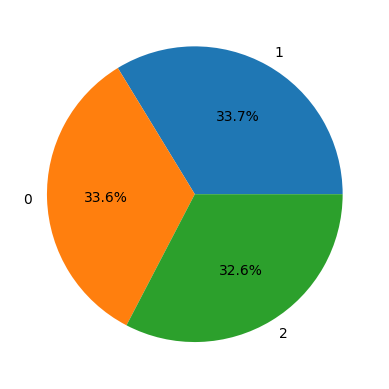

In [ ]:
plt.pie(balanced_df['class'].value_counts().values,
        labels=balanced_df['class'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

Model Building Using classification

In [ ]:

features = balanced_df['tweet']
target = balanced_df['class']
 
X_train, X_val, Y_train, Y_val = train_test_split(features,
                                                  target,
                                                  test_size=0.2,
                                                  random_state=22)
X_train.shape, X_val.shape

((10202,), (2551,))

In [ ]:
Y_train = pd.get_dummies(Y_train)
Y_val = pd.get_dummies(Y_val)
Y_train.shape, Y_val.shape

((10202, 3), (2551, 3))

In [ ]:

max_words = 5000
max_len = 100
 
token = Tokenizer(num_words=max_words,
                  lower=True,
                  split=' ')
 
token.fit_on_texts(X_train)

In [ ]:
max_words = 5000
token = Tokenizer(num_words=max_words,
                  lower=True,
                  split=' ')
token.fit_on_texts(X_train)
 
#Generating token embeddings
Training_seq = token.texts_to_sequences(X_train)
Training_pad = pad_sequences(Training_seq,
                             maxlen=50,
                             padding='post',
                             truncating='post')
 
Testing_seq = token.texts_to_sequences(X_val)
Testing_pad = pad_sequences(Testing_seq,
                            maxlen=50,
                            padding='post',
                            truncating='post')

In [ ]:
#TF-IDF Features-F1
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)

# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df['tweet'] )
tfidf

<24783x7474 sparse matrix of type '<class 'numpy.float64'>'
	with 199694 stored elements in Compressed Sparse Row format>

In [ ]:
X = tfidf
y = df['class'].astype(int)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)
model = LogisticRegression().fit(X_train_tfidf,y_train)
y_preds = model.predict(X_test_tfidf)
report = classification_report( y_test, y_preds )
print(report)
acc=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc)

              precision    recall  f1-score   support

           0       0.59      0.12      0.20       164
           1       0.90      0.97      0.93      1905
           2       0.85      0.81      0.83       410

    accuracy                           0.89      2479
   macro avg       0.78      0.63      0.65      2479
weighted avg       0.87      0.89      0.87      2479

Logistic Regression, Accuracy Score: 0.8854376764824526


c:\Users\Pulkit\Desktop\py\python\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X.toarray(), y, random_state=42, test_size=0.2)
nb=GaussianNB()
nb.fit(X_train_tfidf,y_train)
y_preds = nb.predict(X_test_tfidf)
acc2=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Naive Bayes, Accuracy Score:",acc2)

              precision    recall  f1-score   support

           0       0.10      0.34      0.16       290
           1       0.88      0.71      0.78      3832
           2       0.55      0.58      0.56       835

    accuracy                           0.67      4957
   macro avg       0.51      0.54      0.50      4957
weighted avg       0.78      0.67      0.71      4957

Naive Bayes, Accuracy Score: 0.6655235021182166


In [ ]:
x= np.array(df['tweet'])
y = np.array(df['label'])
cv = CountVectorizer()
x = cv.fit_transform(x)
X_train , x_test , y_train , y_test = train_test_split(x , y  , test_size=0.33 , random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train , y_train)
y_preds = clf.predict(x_test)
acc4 = accuracy_score(y_test , y_preds)
print(acc4)

0.8729673554224233


In [ ]:

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
rf=RandomForestClassifier()
rf.fit(X_train_tfidf,y_train)
y_preds = rf.predict(X_test_tfidf)
acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest, Accuracy Score:",acc1)

                      precision    recall  f1-score   support

             Neither       0.81      0.84      0.82       835
hate speech detected       0.47      0.14      0.21       290
    offensive speech       0.91      0.96      0.93      3832

            accuracy                           0.89      4957
           macro avg       0.73      0.64      0.66      4957
        weighted avg       0.87      0.89      0.87      4957

Random Forest, Accuracy Score: 0.8884405890659673


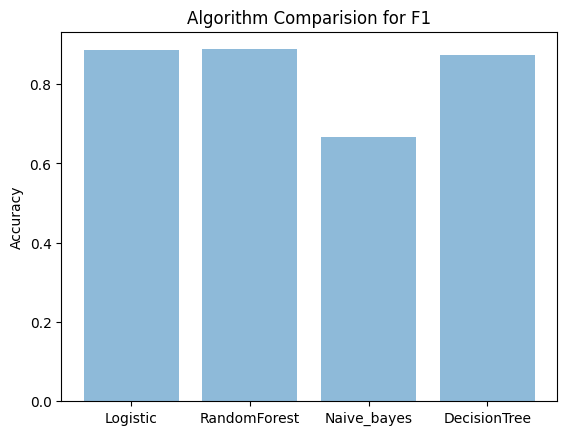

In [ ]:
objects = ('Logistic', 'RandomForest', 'Naive_bayes', 'DecisionTree')
y_pos = np.arange(len(objects))
performance = [acc,acc1,acc2 , acc4]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for F1')
plt.show()

Predicted Value using decesion Tree Model

In [ ]:

from playsound import playsound
 
# for playing note.wav file
playsound('synthesize (2).wav')
playsound('synthesize (1).wav')
import speech_recognition as s_r
print(s_r.__version__) # just to print the version not required
r = s_r.Recognizer()
my_mic = s_r.Microphone(device_index=1) #my device index is 1, you have to put your device index
with my_mic as source:
    print("Say now!!!!")
    r.adjust_for_ambient_noise(source) #reduce noise
    audio = r.listen(source) #take voice input from the microphone
speech = r.recognize_google(audio)
print(speech) #to print voice into text
test_data = "I will kill u"
df = cv.transform([test_data]).toarray()
print(clf.predict(df))


    Error 305 for command:
        close "C:\Users\Pulkit\AppData\Local\Temp\PSstj5qou8.wav"
    Cannot specify extra characters after a string enclosed in quotation marks.
Failed to close the file: "C:\Users\Pulkit\AppData\Local\Temp\PSstj5qou8.wav"


PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Pulkit\\AppData\\Local\\Temp\\PSstj5qou8.wav'

In [ ]:
import seaborn as sns
sns.pairplot(df)

TypeError: 'data' must be pandas DataFrame object, not: <class 'numpy.ndarray'>

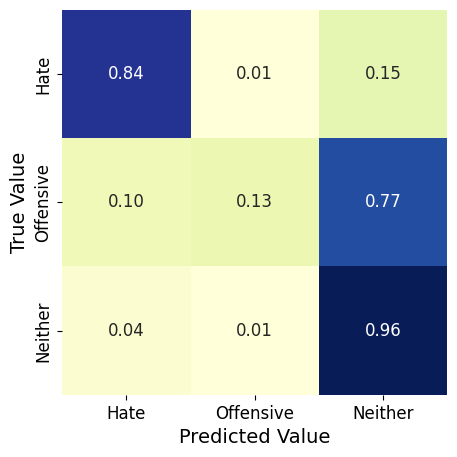

In [ ]:
#Confusion Matrix for TFIDF with additional features 
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

In [ ]:
df.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000
